Importing the Libraries


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

Importing the Dataset

In [45]:
df=pd.read_csv("dataset_FLD.csv",header=None)

Separating The Two Classes (1 and 0)

In [42]:
c1 = df[df.iloc[:, -1] == 1]
c0 = df[df.iloc[:, -1] == 0]

Plotting The Dataset

In [76]:
def plotting3D(data):
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    z=df.iloc[:,2]

    fig = plt.figure(figsize= (10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=data.iloc[:,-1], cmap="cool", alpha= 0.6)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(-5,5)
    ax.set_ylim(-4,4)
    ax.set_zlim(-5,5)

    plt.show()

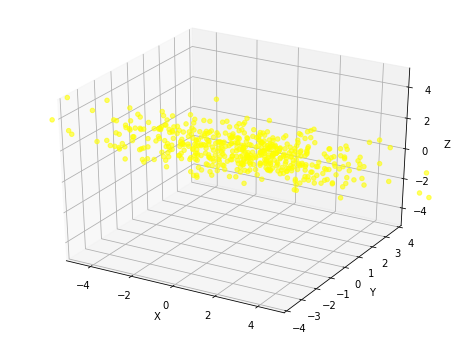

In [77]:
fig = plt.figure(figsize= (8, 6))
ax = fig.add_subplot(111, projection='3d')

x=c1.iloc[:,0]
y=c1.iloc[:,1]
z=c1.iloc[:,2]


ax.scatter(x, y, z, color= 'yellow', alpha= 0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-5,5)
ax.set_ylim(-4,4)
ax.set_zlim(-5,5)

plt.show()

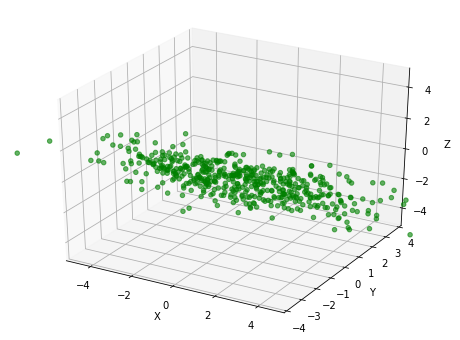

In [78]:
fig = plt.figure(figsize= (8, 6))
ax = fig.add_subplot(111, projection='3d')

x=c0.iloc[:,0]
y=c0.iloc[:,1]
z=c0.iloc[:,2]


ax.scatter(x, y, z, color= 'green', alpha= 0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-5,5)
ax.set_ylim(-4,4)
ax.set_zlim(-5,5)

plt.show()

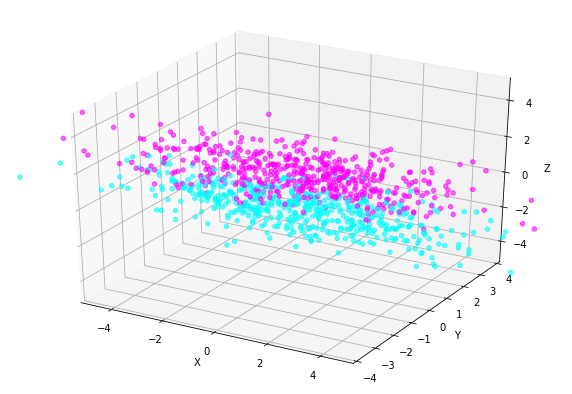

In [79]:
plotting3D(df)

Function for finding roots of equations for normal distribution with quadratic eqn ax^2+bx+c=0

In [80]:
def solve(m1,m2,std1,std2):
    coeff1 = 1/(2*std1**2) - 1/(2*std2**2)
    coeff2 = m2/(std2**2) - m1/(std1**2)
    coeff3 = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    d = np.roots([coeff1,coeff2,coeff3])
    r=0
    for x in d:
        if m2<x and x<m1:
            r=x
    return r

Calculating Sw(Within Class Scatter Matrix)


In [81]:
    c1=df[df.iloc[:,3]==1] 
    c1=c1.iloc[:, [0,1,2]]
    m1=c1.mean(axis=0)
    sub1=c1-m1
    c2=df[df.iloc[:,3]==0]
    c2=c2.iloc[:, [0,1,2]]
    m2=c2.mean(axis=0)
    sub2=c2-m2
    mean=m2-m1
    #print(mean)

    s1=np.dot(np.transpose(sub1),sub1)  #scatter matrix 1
    #print("scatter matrix1:",s1) 
    
    s2=np.dot(np.transpose(sub2),sub2)  #scatter matrix2
    #print("scatter matrix2:",s2)
    
    sw=np.add(s1,s2)                                   #scatter (1+2) 
    print("sw=s1+s2=>",sw)

    swinv=np.linalg.inv(sw)                        #inverse of the sw using linear algebra methods 
    #print("swinv",swinv)

    

sw=s1+s2=> [[9061.37742888  -98.60076737   62.96379808]
 [ -98.60076737  986.20155992   12.88886716]
 [  62.96379808   12.88886716   89.68373253]]


**Calculating W and W_Unit vector(Unit vector along the normal to discriminant Plane)**

In [54]:
    w=np.dot(swinv,m1-m2)           
    print("W vector",w)
    w_unit=w/((w[0]**2+w[1]**2+w[2]**2)**0.5)
    print("W Unit Vector",w_unit)
    # print(w_unit[0]**2+w_unit[1]**2+w_unit[2]**2)
    

W vector [-0.00014845 -0.0004129   0.02263587]
W Unit Vector [-0.00655686 -0.01823739  0.99981218]
0.9999999999999999


Calculating the projected points and calculating their meand and standard deviations


In [82]:
projc1=np.dot(w,np.transpose(c1))   #projection of class 1
projc0=np.dot(w,np.transpose(c2))   #projection of class 0

# caluculation of mean and standard deviation for each class seperately
avg1=projc1.mean()
std1=projc1.std()

avg2=projc0.mean()
std2=projc0.std()
print(avg1,avg2)
print(std1,std2)

0.02283418135064784 -0.02280985897080428
0.008825469869510952 0.0036604866104465623


**Printing The Threshhold**

In [83]:
result = solve(avg1,avg2,std1,std2)
print(result)

-0.008813863129467877


**Making The Necessary Plots**

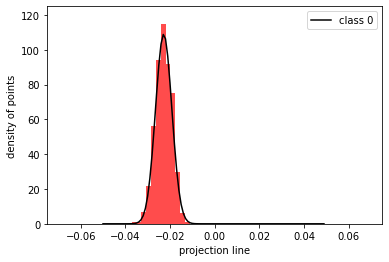

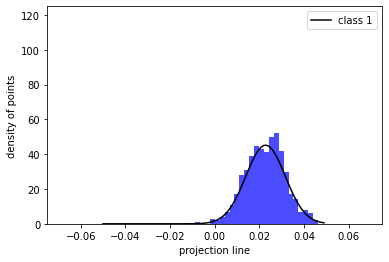

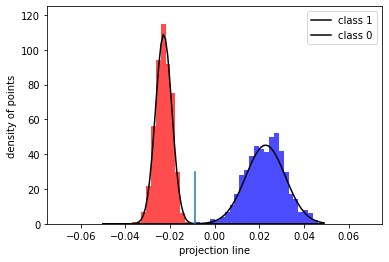

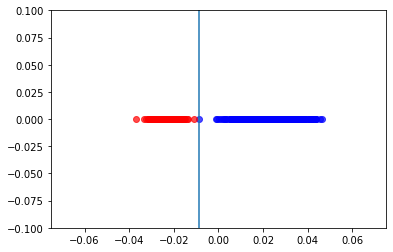

In [90]:
x_all = np.arange(-0.05, 0.05, 0.001)
y1=norm.pdf(x_all,avg1,std1)
y0=norm.pdf(x_all,avg2,std2)

 #value which seperates both the classes 

plt.figure(4)
plt.plot(x_all,y0,c='black',label="class 0")
plt.hist(projc0,bins=12,color="red",alpha=0.7)
plt.xlabel("projection line",fontsize="10")
plt.ylabel("density of points",fontsize="10")
plt.xlim(-0.075, 0.075)
plt.ylim(0,125)
plt.legend()
plt.show()

plt.figure(3)
plt.plot(x_all,y1,c='black',label="class 1")
plt.hist(projc1,bins=25,color="blue",alpha=0.7)
plt.xlabel("projection line",fontsize="10")
plt.ylabel("density of points",fontsize="10")
plt.xlim(-0.075, 0.075)
plt.ylim(0,125)
plt.legend()
plt.show()

plt.figure(2)
plt.plot(x_all,y1,c='black',label="class 1")
plt.hist(projc1,bins=25,color="blue",alpha=0.7)
plt.plot(x_all,y0,c='black',label="class 0")
plt.hist(projc0,bins=12,color="red",alpha=0.7)
plt.xlabel("projection line",fontsize="10")
plt.ylabel("density of points",fontsize="10")
yp= np.linspace(-0.03,0.03,1000)
xp=result*np.ones((1000))
#pery_vals = c + per * perx_vals
plt.plot(xp, yp*1000, '-')
plt.xlim(-0.075, 0.075)
plt.ylim(0,125)
plt.legend()
plt.show()

#ploting the projected points
plt.figure(1)
yp=0*projc1
plt.scatter(projc1,yp,color="blue",alpha=0.7,label="class 1")
yp=0*projc0
plt.scatter(projc0,yp,color="red",alpha=0.7,label="class 0")
yp= np.linspace(-0.03,0.03,1000)
xp=result*np.ones((1000))
#pery_vals = c + per * perx_vals
plt.plot(xp, yp*1000, '-')  
plt.xlim(-0.075, 0.075)
plt.ylim(-0.1,0.1)

pdf1 = norm.pdf(c1, avg1, std1)

pdf2 = norm.pdf(c2, avg2, std2)
plt.show()

**3D Plot with Discriminant Plane**

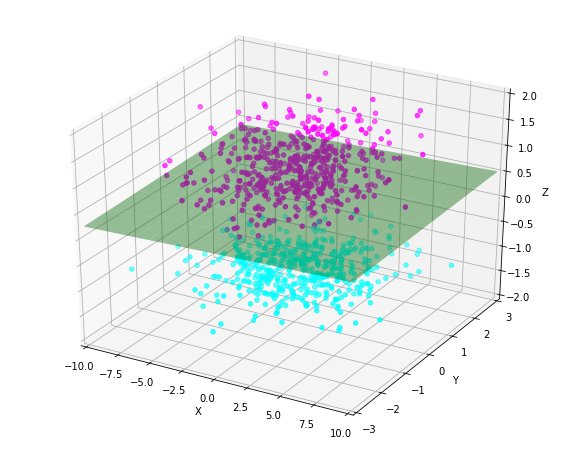

In [93]:
normal = W
point = result
x=df.iloc[:,0]
y=df.iloc[:,1]
z=df.iloc[:,2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=df.iloc[:,3],cmap="cool")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-10,10)
ax.set_ylim(-3,3)
ax.set_zlim(-2,2)

xx, yy = np.meshgrid(range(-10,11), range(-3,4))

z = (-normal[0] * xx - normal[1] * yy - point) * 1. /normal[2]


ax.plot_surface(xx, yy, z, alpha=0.4, color= 'green')
plt.show()